# PIVOT TABLE

In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df.sample(10, random_state=1)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
303776,Data Engineer,Data Center Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-26 17:15:09,False,False,Singapore,None,NaN,NaN,Gateway Search Pte Ltd,['linux'],{'os': ['linux']}
330513,Senior Data Scientist,Big Data Senior - Remote Work,"Machala, Ecuador",via Sercanto,Full-time,False,Ecuador,2023-04-16 23:32:33,True,False,Ecuador,None,NaN,NaN,Emprego,"['java', 'python', 'aws', 'spark', 'hadoop', '...","{'cloud': ['aws'], 'libraries': ['spark', 'had..."
237202,Data Scientist,Database Engineer,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-02-16 07:13:26,False,False,India,None,NaN,NaN,Uplers,"['python', 'sql', 'nosql', 'aws', 'gcp', 'bigq...","{'analyst_tools': ['excel', 'word', 'powerpoin..."
539858,Data Engineer,Spark Data Engineer,Anywhere,via Dice,Contractor,True,Sudan,2023-03-24 20:39:11,False,False,Sudan,None,NaN,NaN,Tektree Systems Inc.,"['python', 'java', 'scala', 'perl', 'shell', '...","{'async': ['jira', 'confluence'], 'cloud': ['b..."
618796,Data Scientist,Environmental Data Scientist,Anywhere,via IMEC,Full-time,True,Netherlands,2023-03-07 12:47:28,False,False,Netherlands,None,NaN,NaN,imec,"['python', 'matlab', 'r', 'c++', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
392419,Senior Data Engineer,Senior Data Engineer,"Munich, Germany",via BeBee Deutschland,Full-time,False,Germany,2023-04-18 18:16:09,False,False,Germany,None,NaN,NaN,ZEISS Group,"['t-sql', 'c#', 'powershell', 'azure', 'databr...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
657919,Data Analyst,Data Analyst,Italy,via BeBee,None,False,Italy,2023-08-09 10:54:04,False,False,Italy,None,NaN,NaN,Adecco Italia,['excel'],{'analyst_tools': ['excel']}
470055,Business Analyst,Contract Analyst I,"Amsterdam, Netherlands",via BeBee,Full-time,False,Netherlands,2023-10-09 14:42:48,True,False,Netherlands,None,NaN,NaN,Deutsche Bank AG,['excel'],{'analyst_tools': ['excel']}
65015,Data Scientist,Data Scientist - Senior,"Colorado Springs, CO",via Relocation Jobs,Full-time,False,"Texas, United States",2023-04-14 06:04:00,False,False,United States,None,NaN,NaN,Amentum,"['r', 'python', 'sql', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
24727,Data Engineer,Data Engineer,"Barcelona, Spain",via LinkedIn,Full-time,False,Spain,2023-06-05 13:33:27,False,False,Spain,None,NaN,NaN,HOLA CONSULTORES SL,"['python', 'sql', 'azure', 'aws', 'airflow', '...","{'cloud': ['azure', 'aws'], 'libraries': ['air..."


## pandas.DataFrame.pivot_table

### Counts of Jobs Title

In [3]:
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
df.pivot_table(values='salary_year_avg', index='job_location', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_location,,,,,,,,,,
"A Coruña, Spain",NaN,90976.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Aarhus, Denmark",NaN,NaN,56700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Abell, MD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166075.0,NaN
"Aberdeen Proving Ground, MD",NaN,NaN,107500.0,NaN,160000.0,NaN,NaN,NaN,NaN,NaN
"Aberdeen, MD",NaN,NaN,60000.0,140000.00,160000.0,NaN,NaN,175000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
"Zwolle, Netherlands",NaN,NaN,NaN,98292.25,NaN,NaN,NaN,NaN,NaN,NaN
"Zürich, Switzerland",NaN,NaN,57100.0,147500.00,131867.0,89100.0,NaN,NaN,89100.0,66759.25
"Zürich, Switzerland (+1 other)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206000.00


In [5]:
df_altered = df.copy()

In [11]:
median_salary = df_altered['salary_year_avg'].median()
df_altered['salary_year_avg'] = df_altered['salary_year_avg'].fillna(median_salary)
df_altered['salary_year_avg']

0         115000.0
1         115000.0
2         115000.0
3         115000.0
4         115000.0
            ...   
785736    115000.0
785737    115000.0
785738    115000.0
785739    115000.0
785740    115000.0
Name: salary_year_avg, Length: 785741, dtype: float64

### Filter top 6 country

In [7]:
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [41]:
df_country_job_salary = df.pivot_table(
    values='salary_year_avg', 
    index='job_location', 
    columns='job_title_short', 
    aggfunc='median'
)

df_country_job_salary = df_country_job_salary.loc[top_countries]

df_country_job_salary

job_titles = ['Data Analyst','Data Scientist','Data Engineer']

df_country_job_salary = df_country_job_salary[job_titles]

df_country_job_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,89500.00,131280.0,127500.0
India,77133.75,162500.0,120500.0
United Kingdom,72900.00,80850.0,146384.5
France,82094.50,90000.0,146000.0
Germany,91587.50,120564.0,146000.0
Spain,101750.00,80850.0,115842.5


Text(0.5, 1.0, 'Median Salary by Job Title base on top 6 countries')

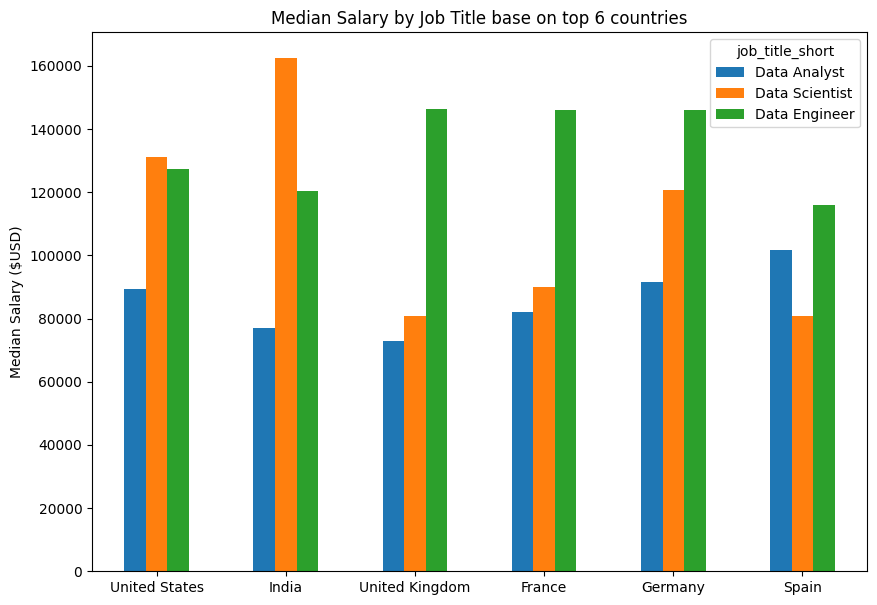

In [31]:
df_country_job_salary.plot(kind='bar', figsize=(10,7))
plt.xticks(rotation=0, ha='center')
plt.xlabel('')
plt.ylabel('Median Salary ($USD)')
plt.title('Median Salary by Job Title base on top 6 countries')

In [32]:
df['job_skills']

0                                                      None
1         ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2         ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3         ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4         ['bash', 'python', 'oracle', 'aws', 'ansible',...
                                ...                        
785736    ['bash', 'python', 'perl', 'linux', 'unix', 'k...
785737                       ['sas', 'sas', 'sql', 'excel']
785738                              ['powerpoint', 'excel']
785739    ['python', 'go', 'nosql', 'sql', 'mongo', 'she...
785740                                      ['aws', 'flow']
Name: job_skills, Length: 785741, dtype: object